In [1]:
import tensorflow as tf
import os
import cv2
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as pyplot
import numpy as np 


Load the Training Dataset
By: Mohnish Sai Prasad

In [2]:
train_data = []
train_label = []

path_train = "/Users/reren/Documents/IdentiFire/Train_Data"

for file_name in os.listdir(path_train):
    label = file_name.split("_")[0]
    img = cv2.imread(os.path.join(path_train,file_name))

    #in case of corrupt file
    if img is None:
        continue
        
    img = cv2.resize(img, (100,100))
    train_data.append(img)
    train_label.append(label)


In [3]:

train_data = np.array(train_data)
train_label = np.array(train_label)



In [4]:
train_data.shape

(4609, 100, 100, 3)

In [5]:
train_label.shape

(4609,)

Load the Test Dataset By: Ahmed Saied

In [6]:
test_data = []
test_label = []

path_test = "/Users/reren/Documents/IdentiFire/Test_Data"

for file_name in os.listdir(path_test):
    label = file_name.split(".")[0]

    #test data is labeled differently
    # match label to what the training set is for consistency
    if label == 'fire':
        label = 'f'
    else:
        label = 'nf'

    img = cv2.imread(os.path.join(path_test,file_name))
    
    #in case of corrupt file
    if img is None:
        continue

    img = cv2.resize(img, (100,100))
    test_data.append(img)
    test_label.append(label)


In [7]:
test_data = np.array(test_data)
test_data.shape
test_label = np.array(test_label)

In [8]:
test_data.shape

(998, 100, 100, 3)

Plot some images to look at.
Use this later when checking wrong predictions

In [9]:
def plot_sample(X, y, index):
    pyplot.figure(figsize = (20,5))
    pyplot.imshow(X[index])
    pyplot.xlabel(y[index])

Normalize Data by diving by 255. OpenCV uses BRG, not RGB. Each image has 3 channels (Blue, Green, Red), each can range from 0-255. 

In [10]:
#train_data = train_data / 255.0
#test_data = test_data / 255.0


Encode label. (Fire = 0; Non_fire = 1)

In [11]:
le = preprocessing.LabelEncoder()
train_label = le.fit_transform(train_label)
test_label = le.fit_transform(test_label)

In [12]:
train_label[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Split the training and validation up

In [13]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.2, shuffle= True)

Normalize Data by diving by 255. OpenCV uses BRG, not RGB. Each image has 3 channels (Blue, Green, Red), each can range from 0-255. 

In [14]:
#train_data = train_data / 255.0
#test_data = test_data / 255.0

Create a CNN

In [15]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

Train the model

In [16]:
model = prepare_model()
model.fit(x_train, y_train, batch_size=256, epochs=8, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/8
15/15 [==============================] - 14s 904ms/step - loss: 10.2591 - accuracy: 0.6008 - val_loss: 0.6390 - val_accuracy: 0.4523
Epoch 2/8
15/15 [==============================] - 13s 901ms/step - loss: 0.5384 - accuracy: 0.7551 - val_loss: 0.5434 - val_accuracy: 0.8449
Epoch 3/8
15/15 [==============================] - 13s 900ms/step - loss: 0.4991 - accuracy: 0.8603 - val_loss: 0.5215 - val_accuracy: 0.8568
Epoch 4/8
15/15 [==============================] - 14s 901ms/step - loss: 0.4837 - accuracy: 0.8731 - val_loss: 0.5073 - val_accuracy: 0.8579
Epoch 5/8
15/15 [==============================] - 14s 912ms/step - loss: 0.4717 - accuracy: 0.8864 - val_loss: 0.5013 - val_accuracy: 0.8807
Epoch 6/8
15/15 [==============================] - 14s 917ms/step - loss: 0.4603 - accuracy: 0.8967 - val_loss: 0.4863 - val_accuracy: 0.8894
Epoch 7/8
15/15 [==============================] - 14s 907ms/step - loss: 0.4474 - accuracy: 0.9056 - val_loss: 0.4930 - val_accuracy: 0.8980
Epoch

Test the Model

In [17]:
model.evaluate(test_data,test_label)

32/32 [==============================] - 1s 26ms/step - loss: 0.2529 - accuracy: 0.9178


[0.25294825434684753, 0.9178356528282166]

In [18]:
#pred = model.predict(test_data)

#trnasfomr the predction of model to binary
#pred = np.transpose(pred)[0]
#pred = list(map(lambda x: 0 if x<0.5 else 1, pred))

#transfrom it back to f or nf to read
#pred = le.inverse_transform(pred)
#test_label = le.inverse_transform(test_label)
#pred[:5]

Dictionary created to find the index easily. Index will be used to see the image that was predicted.

In [19]:
#check = {}

#for count,i in enumerate(pred):
 #   check[count] = i


In [20]:
#print(check)

Plot images to check what the model got wrong.

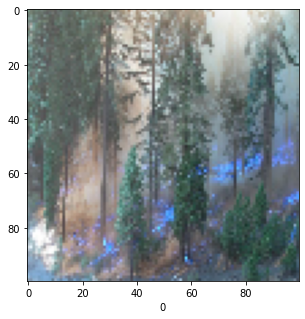

In [21]:
plot_sample(test_data, test_label, 29)